# On Warm-Starting Neural Network Training

The paper is available on [arXiv](https://arxiv.org/abs/1910.08475). In creating the interactive material for this notebook, we utilized the code from this reproducibility challenge: [Re: Warm-Starting Neural Network Training](https://rescience.github.io/bibliography/Kireev_2021.html).

## Goals

At the end of this notebook, you will:

-   learn to identify specific claims, both qualitative and quantitative, in a machine learning research paper
-   learn to identify the specific experiments they would need to run to validate each claim
-   learn to identify the data, code, and hyperparameters needed to run each experiment, and to make appropriate choices when these are not available
-   understand the computational cost associated with reproducing a result, and the effect of missing information on that cost.

## Introduction

Retraining neural networks with new data added to the training set is a time and energy-consuming task. To speed up this process, the technique of warm-starting can be used. Warm-starting involves using the weights of a pre-trained model, trained on a subset of the data, as the starting point for training the complete dataset.

The paper examines the impact of warm-starting on the final model’s accuracy and highlights the presence of a generalization gap in warm-started models. The authors propose a method to address this gap by shrinking the pre-trained weights and introducing a random perturbation.

The warm-starting technique is an effective way to accelerate the training process of large neural network models. However, the paper emphasizes the importance of mitigating the generalization gap in warm-started models, and proposes a method to achieve better accuracy.

Updating datasets over time can be a costly endeavor, making it impractical to retrain models from scratch each time. Therefore, warm-starting becomes crucial as it allows leveraging pre-trained weights on a subset of the data, significantly reducing the time and resources required for training. By utilizing warm-starting, models can be efficiently adapted to incorporate new data without incurring the high computational expenses associated with starting from scratch.

### While experimenting we need to answer some questions to understand the level of reproducibility of this paper:

-   Is there code available for training? for inference?
-   Is it author code, or written by someone else? Are there multiple implementations available?
-   What framework and version was used? Are all the functions are still available or should you make some changes?
-   Did the author compare to other models that are not implemented in the code? Are these models available?
-   Are all hyperparameters for all experiments available? If not, what is the sensitivity of each hyperparameter?
-   Was the initial values set at random?
-   Are the datasets used available? Are there any modifications done to the data?
-   Did our results match that of the original paper?

## Claims by the authors:

The original paper makes several claims that can be classified as either quantitative or qualitative. Read the following claims carefully to be able to conduct the right experiment.

------------------------------------------------------------------------

<p style="color: darkblue; font-size: 16px;">
Warm starting and cold starting are two different ways of initializing the weights of a neural network before training. <b>Cold starting</b> means starting with random weights, while <b>warm starting</b> means starting with weights copied from a previously trained model. In our context the model is previously trained on a subset of the same dataset.
</p>

------------------------------------------------------------------------

<p style="color: crimson;font-size: 16px;">
Which model do you expect to have a better generalization performance (Test accuracy): <br>
<p style="display:inline-block;margin-top:0.5em;margin-left: 2em; color:crimson;font-size: 16px;">
1- Model that uses the weights from a previous model trained on a subset of the data (Warm-starting). <br> 2- Model that starts with random weights (Cold-starting).
</p>
</p>

<p style="color: green; font-size: 16px;">
Answer:
</p>

------------------------------------------------------------------------

### Claim 1: Warm-starting neural network training may result in lower validation accuracy than random initialized models, despite having similar final training accuracy.

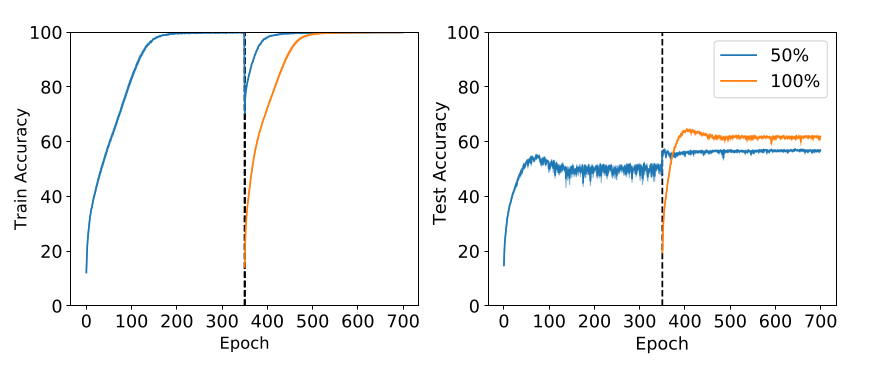 *We compare a warm-starting ResNet-18 model (Blue) and a randomly initialized ResNet-18 model (Orange) on the CIFAR-10 dataset. The warm-starting model first trains on 50% of the data for 350 epochs, then both models train on the full dataset for another 350 epochs. The figure shows that both models overfit the training data, but the randomly initialized model achieves higher test accuracy.*

-   Excerpt:

> “However, warm-starting seems to hurt generalization in deep neural networks. This is particularly troubling because warm-starting does not damage training accuracy.”

-   Type: This claim is qualitative because it states that the warm-start model has worse generalization performance than the fresh-start model, without stating a clear numerical evidence.
-   Experiment: A possible way to evaluate this claim is to use some unseen validation data and compare the performance of the two models using different metrics, such as accuracy, precision, recall, or others. You can also try different model architectures and datasets to test the claim’s robustness.

------------------------------------------------------------------------

### Claim 2: Warm-started models had worse test accuracies than randomly initialized models on CIFAR-10, SVHN, and CIFAR-100, using ResNet-18 and MLP.

|  CIFAR-10   | ResNet-SGD | ResNet-Adam | MLP-SGD | MLP-Adam | CIFAR-100 | ResNet-SGD | ResNet-Adam | MLP-SGD | MLP-Adam | SVHN | ResNet-SGD | ResNet-Adam | MLP-SGD | MLP-Adam |
|:----:|:---:|:----:|:---:|:---:|:----:|:---:|:----:|:---:|:---:|:----:|:---:|:----:|:---:|:---:|
| Random init |    56.2    |    78.0     |  39.0   |   39.4   |           |    18.2    |    41.4     |  10.3   |   11.6   |      |    89.4    |    93.6     |  76.5   |   76.7   |
| Warm-Start  |    51.7    |    74.4     |  37.4   |   36.1   |           |    15.5    |    35.0     |   9.4   |   9.9    |      |    87.5    |    93.5     |  75.4   |   69.4   |
| Difference  |    4.5     |     3.6     |   1.6   |   3.3    |           |    2.7     |     6.4     |   0.9   |   1.7    |      |    1.9     |     0.1     |   1.1   |   7.3    |

-   Excerpt:

> “Our results (Table 1) indicate that generalization performance is damaged consistently and significantly for both ResNets and MLPs. This effect is more dramatic for CIFAR-10, which is considered relatively challenging to model (requiring, e.g., data augmentation), than for SVHN, which is considered easier.”

-   Type: This is a quantitative claim, as it uses numerical values to compare the performance of different models on different datasets.
-   Experiment: To verify this claim, you will need to follow the authors’ details and train the models mentioned. Then, you will need to compare their test accuracies. However, some of the accuracy differences are very small, especially for the SVHN dataset. Therefore, reproducing these results may be difficult without the authors’ hyperparameters.

------------------------------------------------------------------------

<p style="color: darkblue; font-size: 16px;">
The authors reported that ResNet and MLP, which had non-convex loss surfaces, suffered from warm-starting. However, logistic regression, which had a convex loss surface, did not. This is because a convex loss surface has only one local minimum which is the global minimum, while a non-convex loss surface has many local minima.
</p>

------------------------------------------------------------------------

<p style="color: crimson;font-size: 16px;">
Can we apply warm-starting to train an SVM model without compromising its generalization performance, given that it has a convex loss surface? Describe how the shape of the loss surface influences your answer.
</p>

<p style="color: green; font-size: 16px;">
Answer:
</p>

------------------------------------------------------------------------

### Claim 3: Warm-starting does not affect the generalization performance of Logistic Regression.

|  CIFAR-10   | LR-SGD | LR-Adam | CIFAR-100 | LR-SGD | LR-Adam | SVHN | LR-SGD | LR-Adam |
|:-------:|:------:|:-------:|:-------:|:------:|:-------:|:-------:|:------:|:-------:|
| Random init |  40.5  |  33.8   |           |  16.9  |  10.2   |      |  28.0  |  22.4   |
| Warm-Start  |  39.6  |  33.3   |           |  16.3  |   9.9   |      |  28.0  |  22.2   |
| Difference  |  0.9   |   0.5   |           |  0.6   |   0.3   |      |   0    |   0.2   |

-   Excerpt:

> “Logistic regression, which enjoys a convex loss surface, is not significantly damaged by warm starting for any datasets.”

-   Type: This is a quantitative claim, as it uses numerical values to show that the accuracies of warm-started and cold-started logistic regression models are very similar.
-   Experiment: To verify this, train two logistic regression models, one warm-started and one randomly initialized, and compare their test accuracies.

------------------------------------------------------------------------

<p style="color: darkblue; font-size: 16px;">
In most cases it is a reasonable strategy to warm-start the model and potentially achieve quicker convergence. As it would be inefficient to discard the old model that has already learned something.
</p>

------------------------------------------------------------------------

<p style="color: crimson;font-size: 16px;">
Do you think warm-starting models will take more or less training time than random initialized models?
</p>

<p style="color: green; font-size: 16px;">
Answer:
</p>

------------------------------------------------------------------------

### Claim 4: Warm-starting neural networks saves resources and time, but lowers accuracy by 10% compared to fresh models.

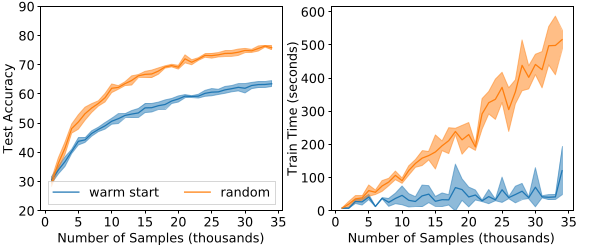  
*The data is divided into 1000-sample batches for online training. The warm-started (Blue) and randomly initialized (Orange) models train until 99% training accuracy. The plots show how training time and test accuracy vary with the number of samples.*

-   Excerpt:

> “Nevertheless, it is highly desirable to be able to warm-start neural network training, as it would dramatically reduce the resource usage associated with the construction of performant deep learning systems.”

-   Type: This claim is quantitative because it compares relation between the training time and mechanism used for initialization of weights. The figure also shows that there is more than a 10% difference in test accuracy given a certain training accuracy threshold ( 99% ).
-   Experiment: A possible way to test this claim is to run an online training experiment with model; one of them should initialized using the old version and the other with random initialization each time and compare there test accuracies at the end.

------------------------------------------------------------------------

**Based on your understanding of the previous claims, answer the following question.**

<p style="color: crimson;font-size: 16px;">
You have a trained model for a classification project. The dataset has 10,000 new samples. Your team wants to use the new data. One option is to retrain the model from scratch. Another option is to warm-start the model with the current weights. Which option do you prefer? Give a brief reason for your choice.
</p>

<p style="color: green; font-size: 16px;">
Answer:
</p>

------------------------------------------------------------------------

<p style="color: darkblue; font-size: 16px;">
The authors conducted a series of experiments to test the effect of warm-starting on different aspects of the model training. They changed the values of the learning rates and batch sizes, which control the speed and stability of the optimization process. They also varied the number of epochs, which determine how long the warm-started model is trained for. Finally, they applied different regularization techniques, which aim to prevent overfitting and improve generalization. They compared the results of these experiments with the baseline cold-starting method.
</p>

------------------------------------------------------------------------

<p style="color: crimson;font-size: 16px;">
How do you assess the potential of hyperparameter search or different regularization techniques to reduce the generalization gap? Provide a brief justification for your answer.
</p>

<p style="color: green; font-size: 16px;">
Answer:
</p>

------------------------------------------------------------------------

### Claim #: Warm-starting neural network training can achieve comparable generalization performance to randomly initialized models by tuning the batch size and learning rates, but without any benifit in training time.

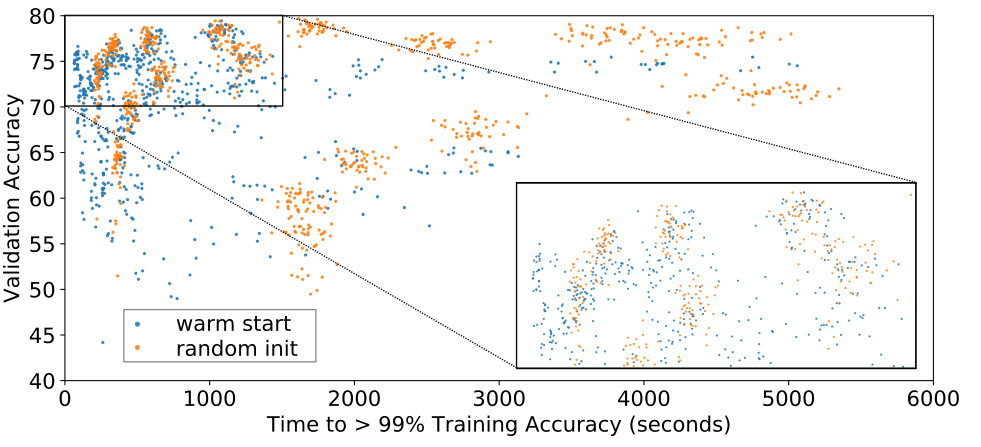 *This is Figure 3 from the paper, each dot represent a ResNet model validation accuracy on CIFAR-10 dataset, where warm-starting models are blue and randomly initialized models are orange. Each dot corresponds to a model with a different combination of learning rate and batch size.*

-   Excerpt:

> “Interestingly, we do find warm-started models that perform as well as randomly-initialized models, but they are unable to do so while benefiting from their warm-started initialization. The training time for warm-started ResNet models that generalize as well as randomly-initialized models is roughly the same as those randomly-initialized models.”

-   Type: This claim is qualitative because it specifies that the generalization performance is comparable but not how comparable it is, or which values acheive these results.
-   Experiment: You can verify this claim by trying different combinations of batch sizes and learning rates then plot the performance - training time relation for warm-start and cold-start models.

------------------------------------------------------------------------

### Claim #: A little training with a warm-start model can lead to loss of generality.

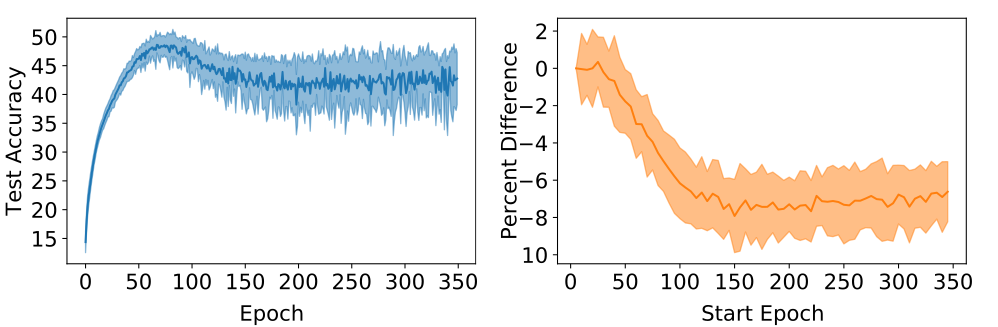 *This is Figure 4 from the paper, showing the validation accuracy (left) on 50% of data and the percent damage (right) of warm-starting ResNet models on 100% of the data. The warm-starting models are trained on 50% of the data and checkpointed every 5 epochs. The percent damage is the difference in validation accuracy between the warm-starting models and the baseline model that is randomly initialized and trained on 100% of the data.*

-   Excerpt:

> “One surprising result in our investigation is that only a small amount of training is necessary to damage the validation performance of the warm-started model.”

-   Type: This claim is qualitative as it lacks the details of the ranges or factors that affect the generality.
-   Experiment: A possible way to verify this claim is to train the warm-start model on a subset of the data for a few epochs and measure its performance. Then, use the full data and observe how the performance drops.

------------------------------------------------------------------------

### Claim #: For the regularization values of 0.1, 0.001, 0.0001, and 0.00001 respectively, the performance gap remained even after applying regularization. The gap for L2 regularization was 8.8, 4.2, 4.1, and 4.7; for adversarial training, it was 2.4, 2.5, 2.6, and 5.4; and for confidence-penalized training, it was 2.8, 5.8, 4.2, and 6.6.

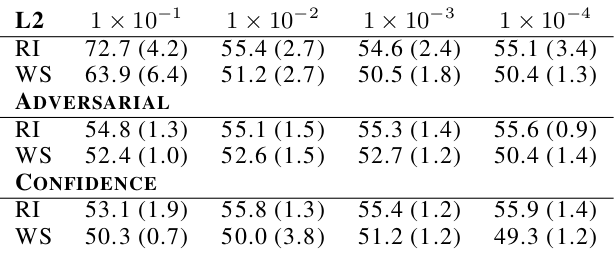  

-   Excerpt:

> “We apply regularization in both rounds of training, and while it is helpful, regularization does not resolve the generalization gap induced by warm starting.”

-   Type: This claim is a quantitative as it compares the test accuracies of warm-start and cold-start models after using different regularization methods.
-   Experiment: Evaluate the effect of different regularization methods on the generalization gap for warm-start and cold-start models. The authors used weight decay, confidence penalized training and adversarial training as regularization methods.

------------------------------------------------------------------------

<p style="color: darkblue; font-size: 16px;">
The authors proposed a method, which they named the shrink-perturb method. In this technique, the weight is reduced by a factor of `λ` and then perturbed by some noise `p` in the new weight update. The weights are initialized before each training round using this equation: <b> W<sub>t</sub> = λW<sub>t-1</sub> + p<sub>t</sub></b>
</p>

------------------------------------------------------------------------

<p style="color: crimson;font-size: 16px;">
Do you think this method should lead to better or worse results?
</p>

<p style="color: green; font-size: 16px;">
Answer:
</p>

------------------------------------------------------------------------

### Claim #: The shrink-and-perturb trick can overcome the generalization gap between warm-starting and cold-starting in several important situations.

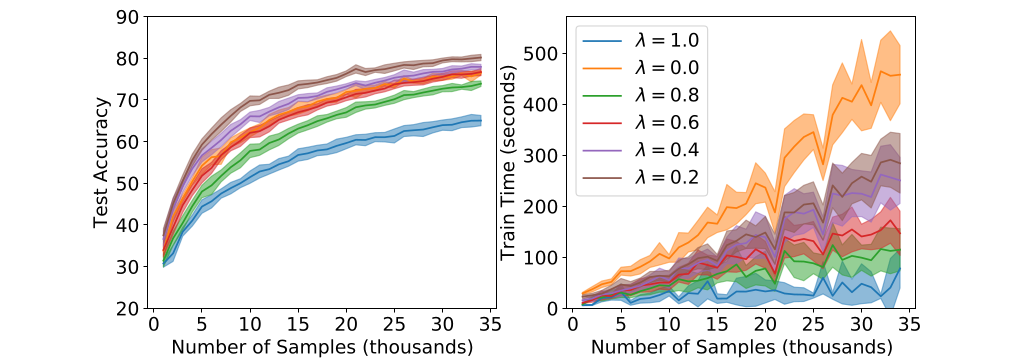  
*This is Figure 7 from the paper where author compare the model performance with different shrink factors in an online learning experiment with the same setting as in claim 4*

-   Excerpt:

> “We describe a simple trick that overcomes this pathology, and report on experiments that give insights into its behavior in batch online learning and pre-training scenarios.”

-   Type: This claim is a qualitative as it describes a new mechanism to solve the warm-starting generalization gap.
-   Experiment: To test this claim, you can experiment with different values of shrinkage and perturbation on warm-starting weights, and measure the performance of the models with and without this trick. You should cover different situations as explained in the paper.

------------------------------------------------------------------------

<p style="color: crimson;font-size: 16px;">
What do you think is the reason for the loss of generality when warm starting the model?
</p>

<p style="color: green; font-size: 16px;">
Answer:
</p>

------------------------------------------------------------------------

<p style="color: darkblue; font-size: 16px;">
When a model is warm-started, it faces a challenge of learning from new data that it has not encountered before, while preserving the knowledge it has acquired from the previous data. The new data tends to produce much larger gradients than the old data leading to gradient imbalance, which can disrupt the optimization. The authors proposed a simple technique of shrinking the model’s weights towards zero, which increases the loss and the gradient magnitude for both old and new data, making them more balanced and easier to optimize.
</p>

------------------------------------------------------------------------

### Claim #: The shrink-and-perturb trick can reduce the generalization gap by eliminating the average gradient discrepancy between the first and second training.

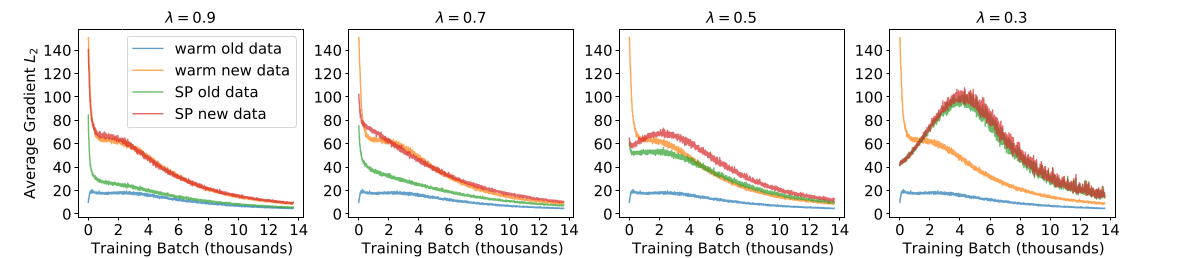 *This is Figure 5 of the original paper, it shows gradient norms for warm-starting models with and without the shrink-pertrub trick. The old models are trained ResNet models on 50% of CIFAR-10 dataset and the new models are trained on the remainder of the dataset.*

-   Excerpt:

> “The success of the shrink and perturb trick may lie in its ability to standardize gradients while preserving a model’s learned hypothesis.”

-   Type: This is a qualitative claim.
-   Experiment: Testing this claim will be by trying different shrink and perturbation value and check how it affect the average gradients in training.

------------------------------------------------------------------------

### Claim #: The generalization performance of pretrained models can be enhanced by using the shrink-and-perturb trick when the datasets are small or limited.

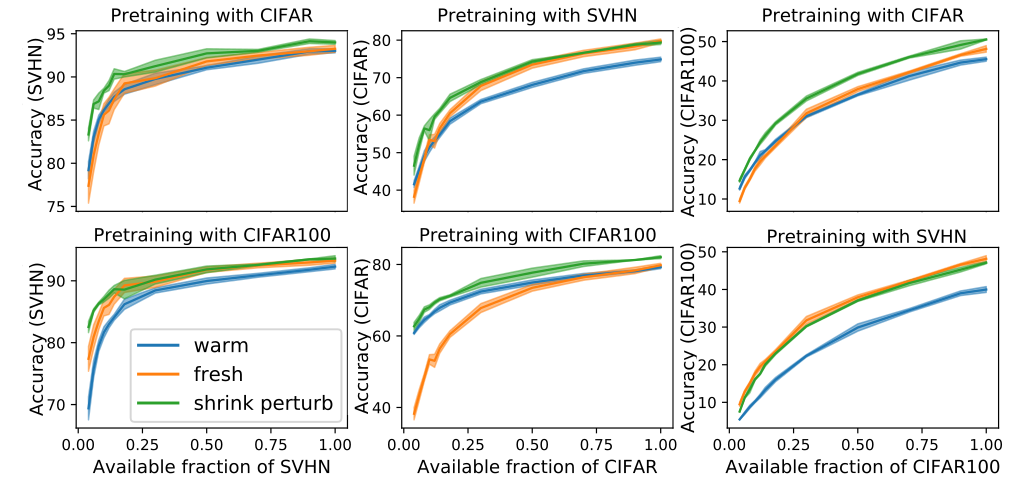 *This is figure 9 in the original paper, showing how the shrink-and-perturb trick can be used to pretrain on similar datasets*

-   Excerpt:

> “We find that shrink-perturb initialization, however, allows us to avoid having to make such a prediction: shrink-perturbed models perform at least as well as warm-started models when pre-training is the most performant strategy and as well as randomly-initialized models when it is better to learn from scratch.”

-   Type: This claim is qualitative.
-   Experiment: Testing this claim will be by using shrink-and-perturb trick to transfer learn models pretrained on different datasets.

------------------------------------------------------------------------

**To summarize the previous claims:**

-   Training a model initialized with the weights trained on a part of the same dataset leads to loss of generality in the deep neural network, identified as the warm-starting gap. A model trained on 100% of the data at once takes more time to train but yields better results.
-   The warm-starting gap is independent of batch size and learning rate.
-   Only a little training with a warm-starting model can lead to a loss of generality.
-   Regularization doesn’t resolve the generalization gap.
-   Shrinking the weights doesn’t significantly affect models without bias or batch normalization, but extreme shrinking can impact the performance of more sophisticated architectures.
-   Adding perturbation (noise) after shrinking improves both training time and generalization performance.
-   Utilizing the shrink-perturb trick can close the generalization gap and provide similar results to a newly randomly initialized model in less training time.

## Functions

The following part contains data loaders, models, and training functions that will be used. Please note that you are not required to implement any of these functions, but rather read the notes on how to use them and understand their purpose.

### Data Loaders

The paper utilizes publicly available datasets, including CIFAR10, CIFAR100, and SVHN. We will create data loaders that match the specifications of the data used in the paper.

In [ ]:
## The next few cell should contain the code with explaination on how to use the dataloaders. 
## The only functions the students will need to run are the training functions at the end however I will be adding
## explaination to everything.

### Models:

The model used in the paper are Logistic Regression, 3-Layer Resnet-18 and Multi-layer perceptron.

In [ ]:
## The next few cells will contain the model implementations as function to be called in the training. 
## Explaination on the architecture and maybe some references will be added just in case anyone is curious to 
## understand the model architecture.

### Training:

The training function will be added in this section, there are different training functions for different experiments.

I will add explaination on to use these fucntions and give some examples as the students will have to use these functions.

In [ ]:
## The next few cells will contain the function with detailed explaination on how to use them

## Experiments

In this section, we will utilize the previously defined functions to test the claims made by the authors. You will come across sections in the code marked with `#TODO`, where you need to add one or two functions.

Please use the hyperparameter values provided in the paper. If certain hyperparameters are not provided, feel free to use your own values.

### Experiment n: Testing Claim m

In this experiment, we aim to validate the m’th claim mentioned in the paper. The authors have provided a specific section and a corresponding figure to support their claim.

Our objective is to reproduce the figure and then compare it with the original one.

To accomplish this, we need to identify the hyperparameter values required for this experiment and include them in the training function.

Hint:

-   Utilize the `train1` function for this particular experiment.
-   Run the `plot_fig#` function in the subsequent cell.

(I will add assertions to ensure the proper utilization of resources and to detect any potential issues in the process.)

In [ ]:
## Example on the student should write
# TODO
params = get_params(the hyperparameter values he chooses)
returned_values_if_any = train(params)
# End

In [ ]:
plot_fig#()

After the figure I will the figure that I got when doing this myself so they can make sure the one they got is right. I will also add some notes about the results, whether they match or not and so.

#### The previous is repeated for all claims

## Conclusion

In this section we will answer the questions in the begining of the notebook and maybe leave some room for the student to add his answers